## Chapter 2: Orbit Determination from Observations

Exercises done in this section: 2.1, 2.2


In [1]:
# Importing math and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Problem 2.1

r = [0, 0, 1]
v = [1, 0, 0]

mu = 1

h = np.cross(r, v)
I = [1, 0, 0]
K = [0, 0, 1]

n = np.cross(K, h)

# From eq. 1.5-10
e = np.cross(v, h)/mu - r
e = np.linalg.norm(e)

p = pow(np.linalg.norm(h), 2) / mu
a = p / (1 - pow(e,2))

i = 180 * np.arccos(np.dot(K, h)) / np.pi

Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi
w = np.arccos(np.dot(n, e) / np.linalg.norm(n*e))

print("Semi-Major Axis: a = %.2f DU" % a)
print("Eccentricity: e = %.2f " % e)
print("Inclination: i = %.2f degrees" % i)
print("Longitude of Ascending Node: Omega = %.2f degrees" % Omega)
print("Argument of Periapsis: w = undefined")

Semi-Major Axis: a = 1.00 DU
Eccentricity: e = 0.00 
Inclination: i = 90.00 degrees
Longitude of Ascending Node: Omega = 180.00 degrees
Argument of Periapsis: w = undefined


Semi-Major Axis: a = 0.12 DU
Semi-Lactus Rectum: p = 1/8 DU
Eccentricity: e = 0.000 
Inclination: i = 180.00 degrees
Longitude of Ascending Node: Omega = undefined
Argument of Periapsis: w = undefined 
True Anomaly at Epoch: nu0 = 171.87 degrees


Orbit is retrograte equatorial


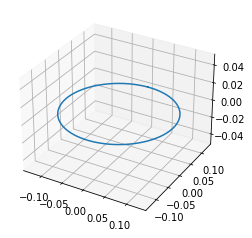

In [4]:
# Problem 2.2

r = [-0.707, 0.707, 0]
v = [0, 1/2, 0]
mu = 1

I = [1, 0, 0]
K = [0, 0, 1]

h = np.cross(r, v)
n = np.cross(K, h)

e_vec = np.cross(v, h)/mu - r
e = np.linalg.norm(e)

p = pow(np.linalg.norm(h), 2) / mu
a = p / (1 - pow(e,2))

i = 180 * np.arccos(np.dot(K, h) / np.linalg.norm(h)) / np.pi

Omega = 180 * np.arccos(np.dot(n, I)/np.linalg.norm(n)) / np.pi
w = np.arccos(np.dot(n, e) / np.linalg.norm(n*e))
w = np.linalg.norm(w)

nu0 = 180 * np.arccos(np.dot(e_vec, r) / (np.linalg.norm(e_vec) * np.linalg.norm(r))) / np.pi

print("Semi-Major Axis: a = %.2f DU" % a)
print("Semi-Lactus Rectum: p = 1/8 DU")
print("Eccentricity: e = %.3f " % e)
print("Inclination: i = %.2f degrees" % i)
print("Longitude of Ascending Node: Omega = undefined")
print("Argument of Periapsis: w = undefined " % w)
print("True Anomaly at Epoch: nu0 = %.2f degrees" % nu0)
print()
print()

print("Orbit is retrograte equatorial")
# Plotting the orbit in 3D space
# Since i = 180 degrees, this orbit is retrograde equatorial. This way, the z-component of the orbit is always 0
nu = np.arange(0, 2*np.pi, 0.01)
r = p/(1+e*np.cos(nu))
x = r * np.sin(nu)
y = r * np.cos(nu)
z = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

